> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 3.9 - Visualização de Dados

## Exercícios
Vamos trabalhar com as mesmas bases de dados do exercício de Pandas. Aqui estão os links caso você queira baixar novamente, mas recomendo trabalhar com o `wc_formatado.csv` que exportamos na questão Q2 do exercício anterior.

* https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1930_2022.csv
* https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1991_2023.csv

Para relembrar, essas são as colunas do dataframe:
```
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time_1             1312 non-null   string        
 1   time_2             1312 non-null   string        
 2   gols_1             1312 non-null   int64         
 3   gols_2             1312 non-null   int64         
 4   data               1312 non-null   datetime64[ns]
 5   ano                1312 non-null   int64         
 6   país_sede          1312 non-null   string        
 7   comparecimento     1312 non-null   int64         
 8   resultado          1312 non-null   string        
 9   rodada             1312 non-null   category      
 10  gols_1_detalhes    970 non-null    string        
 11  gols_2_detalhes    771 non-null    string        
 12  gols_1_contra      57 non-null     string        
 13  gols_2_contra      30 non-null     string        
 14  gols_1_penalti     170 non-null    string        
 15  gols_2_penalti     119 non-null    string        
 16  cartao_vermelho_1  59 non-null     string        
 17  cartao_vermelho_2  65 non-null     string        
 18  cartao_amarelo_1   834 non-null    string        
 19  cartao_amarelo_2   857 non-null    string        
 20  copa               1312 non-null   string 
```

#### Q1.
Realize todos os imports necessários para executar as três bibliotecas de visualização que conhecemos:
* Matplotlib (lembre-se do comando mágico)
* Seaborn
* Plotly

Para cada uma delas, altere o tema padrão de visualização. 

In [1]:
# Importando pandas e numpy
import pandas as pd
import numpy as np

# Configurando pandas
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',5)

# Importanto pyplot do matplotlib
import matplotlib.pyplot as plt
# Método mágico que permite que os gráficos sejam exibido automaticamente sem necessitarem do plt.show()
%matplotlib inline
# Importando seaborn
import seaborn as sns
# Importando Express do Plotly
import plotly.express as px
# Importando Graph Objects do Plotly
import plotly.graph_objects as po


# Importando base de dados da copa do mundo
wc = pd.read_csv("wc_formatado.csv")

from numpy.dtypes import ObjectDType as npObject

colunas_object = [i for i in wc.columns if wc[i].dtype == npObject]

for i in colunas_object:
    if i == "data": tipo = "datetime64[ns]"
    elif i == "rodada": tipo = "category"
    else: tipo = "string"

    wc[i] = wc[i].astype(tipo)

display(wc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time_1             1312 non-null   string        
 1   time_2             1312 non-null   string        
 2   gols_1             1312 non-null   int64         
 3   gols_2             1312 non-null   int64         
 4   data               1312 non-null   datetime64[ns]
 5   ano                1312 non-null   int64         
 6   país_sede          1312 non-null   string        
 7   comparecimento     1312 non-null   int64         
 8   resultado          1312 non-null   string        
 9   rodada             1312 non-null   category      
 10  gols_1_detalhes    970 non-null    string        
 11  gols_2_detalhes    771 non-null    string        
 12  gols_1_contra      57 non-null     string        
 13  gols_2_contra      30 non-null     string        
 14  gols_1_p

None

#### Q2.
Sobre os dados de copa do mundo, qual a distribuição de público presente nos jogos? Isso pode ser respondido com um histograma com os dados da coluna `comparecimento`.  

Lembre-se que alguns jogos estavam com público 0 incorretamente, que tal remover essas ocorrências para não atrapalhar sua visualzação?

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos de título e rótulos de dimensão.

In [2]:
# Definindo base de dados sem as linha com comparecimento 0
wc_audiencia = wc.loc[wc.comparecimento > 0].sort_values("data", ascending=True)

# Dados de contextualização do gráfico
hist_dados = {
    "xlabel" : "Audiência dos jogos",
    "ylabel" : "Frequência",
    "title" : "Historiograma de Audiências das Copas do Mundo"
    }

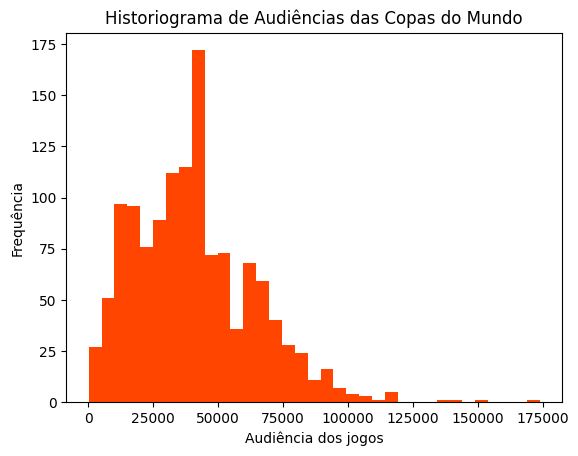

In [3]:
#### Solução com matplotlib

plt.hist(wc_audiencia["comparecimento"], bins=35, color="orangered")
plt.xlabel(hist_dados["xlabel"])
plt.ylabel(hist_dados["ylabel"])
plt.title(hist_dados["title"])

print()


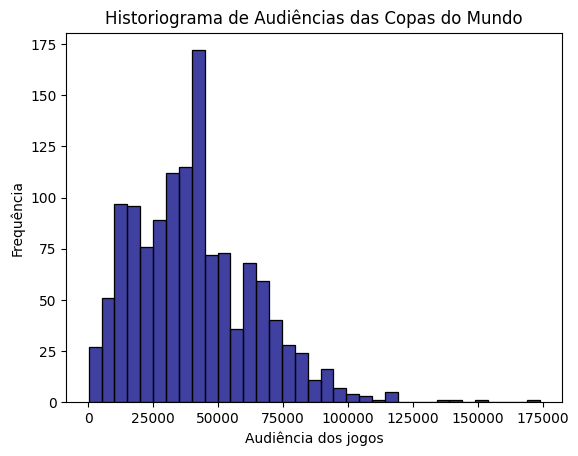

In [4]:
#### solução com seaborn
sns.histplot(wc_audiencia["comparecimento"], bins=35, color="navy").set(
    xlabel=hist_dados["xlabel"],
    ylabel=hist_dados["ylabel"],
    title=hist_dados["title"]
    )

print()

In [5]:
#### solução com plotly
fig = px.histogram(wc_audiencia, x="comparecimento", nbins=35,)

fig.update_layout(title={
    'text' : hist_dados["title"],
    'y': 0.95,
    'x': 0.5
}, xaxis_title=hist_dados["xlabel"], yaxis_title=hist_dados["ylabel"])

fig.update_traces(marker_color='crimson')

fig.show()

#### Q3.

Apresente um gráfico de dispersão (scatter) dos atributos `gols_1` e `gols_2`. Isso representa a relação entre gols feitos e gols tomados por jogo. Há alguma relação interessante entre esses atributos?

Para facilitar a visualização dos dados (já que tem muitos placares repetidos), aplique uma leve distorção aos dados para que cada ponto esteja deslocado aleatoriamente de seu valor original. Código apresentado a seguir
```python
gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc),2))
```

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos de título e rótulos de dimensão.

In [6]:
# Distorção dos placares
gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc), 2))

# Dados de contextualização do gráfico
scatter_dados = {
    "xlabel" : "Gols marcados",
    "ylabel" : "Gols rebebidos",
    "title" : "Relação entre gols recebidos e gols marcados"
}

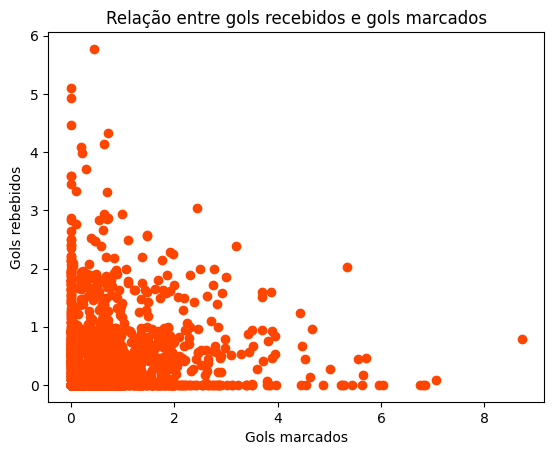

In [7]:
#### solução com matplotlib
plt.scatter(x=gols.gols_1, y=gols.gols_2, c="orangered")
plt.xlabel(scatter_dados["xlabel"])
plt.ylabel(scatter_dados["ylabel"])
plt.title(scatter_dados["title"])

print()

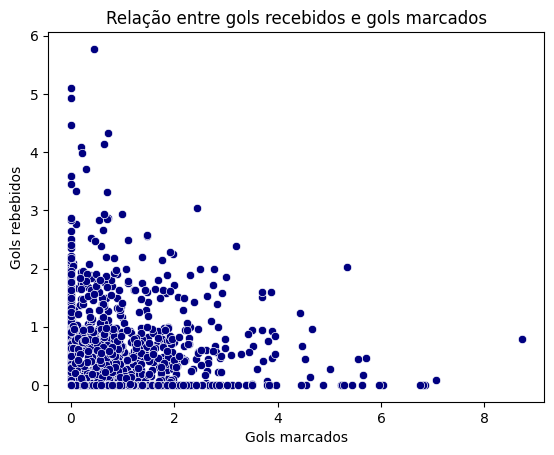

In [8]:
#### solução com seaborn
sns.scatterplot(gols, x="gols_1", y="gols_2", color="navy").set(
    xlabel=scatter_dados["xlabel"],
    ylabel=scatter_dados["ylabel"],
    title=scatter_dados["title"]
)

print()

In [9]:
#### solução com plotly

fig = px.scatter(gols, x='gols_1', y='gols_2',
                 labels={
                     "gols_1" : scatter_dados["xlabel"],
                     "gols_2" : scatter_dados["ylabel"]
                 })

fig.update_layout(title={
    "text" : scatter_dados["title"],
    "x" : 0.5,
    "y": 0.95
})

fig.update_traces(marker_color="crimson")

fig.show()

#### Q4.

Apresente um gráfico de barras com o top 10 países que mais participaram de copas do mundo, onde no eixo x devem estar o nome dos países e no eixo y a contagem de participações. Você deve separar a contagem de participações em copas femininas e masculinas, empilhando as barras de cada informação.

No exemplo de barras empilhadas da galeria do matplotlib, imagine que a parte azul são as participações do país em copas masculinas, e em laranja as participações femininas:
* https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos:
* título
* rótulos de dimensão.
* legenda

In [10]:
# Dados de contextualização do gráfico
bar_dados = {
    "xlabel" : "Países",
    "ylabel" : "Número de participações",
    "title" : "Os 10 Países que Mais Participaram Copa"
}



# Separando os dados a serem utilizados para time_1 e time_2
time_1 = wc[["time_1", "ano", "copa"]]
time_2 = wc[["time_2", "ano", "copa"]]

# Renomenado colunas
time_1.columns = ["país", "participações", "copa"]
time_2.columns = ["país", "participações", "copa"]

# Juntando as duas listas descatando dados repetidos e agrupando por país e copa
copas = pd.concat([time_1, time_2]).groupby(by=["país", "copa"])["participações"].nunique().reset_index()

# Somando todas as participações de cada país
copas_totais = copas.groupby(by="país")["participações"].sum().reset_index()
# Nomes dos 10 paíse com mais participações da copa ordenados
top10_paises = copas_totais.sort_values(by="participações", ascending=False).head(10)["país"]


# Criação do novo dataframe com as participações dos 10 países que mais participaram da copa
top10 = pd.DataFrame(columns=["país", "participações", "copa"])

for pais in top10_paises:
    pais_copas = copas.loc[copas["país"] == pais]

    top10 = pd.concat([top10, pais_copas]).reset_index(drop=True)


/tmp/ipykernel_16222/677594505.py:33: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



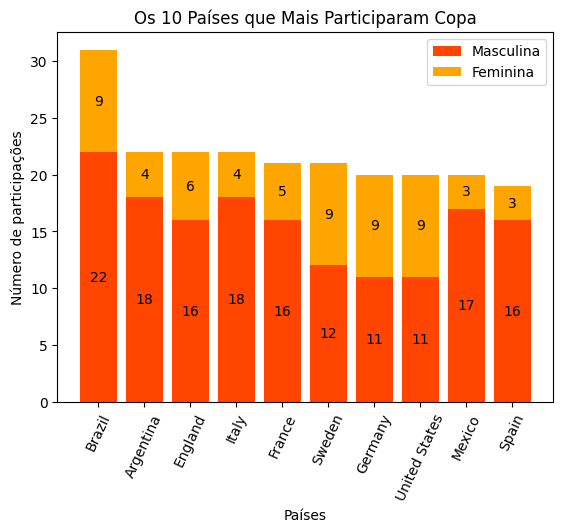

In [11]:
#### solução com matplotlib
part_m = top10.loc[top10.copa == "Masculina", "participações"]
part_f = top10.loc[top10.copa == "Feminina", "participações"]

bar_m = plt.bar(top10_paises, part_m, label="Masculina", color="orangered")
bar_f = plt.bar(top10_paises, part_f, bottom=part_m, label="Feminina", color="orange")
plt.bar_label(bar_m, label_type="center")
plt.bar_label(bar_f, label_type="center")

plt.xlabel(bar_dados["xlabel"])
plt.ylabel(bar_dados["ylabel"])
plt.xticks(rotation = 65)
plt.title(bar_dados["title"])
plt.legend()

print()
        

      país participações       copa
0   Brazil             9   Feminina
1   Brazil            22  Masculina
..     ...           ...        ...
18   Spain             3   Feminina
19   Spain            16  Masculina

[20 rows x 3 columns]


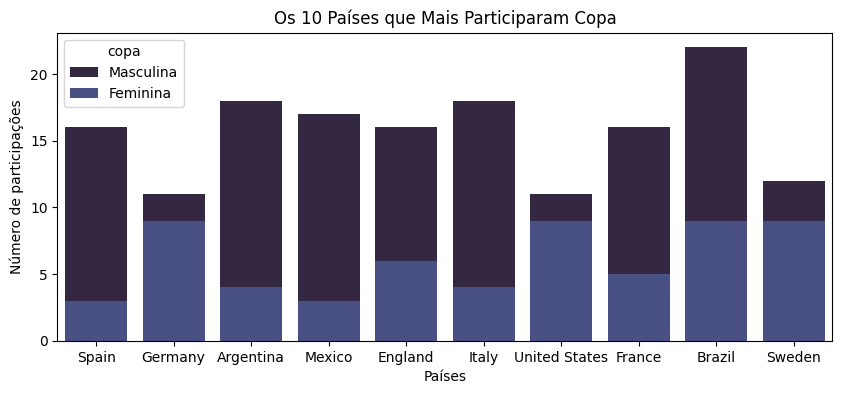

In [12]:
#### solução com seaborn

plt.figure(figsize=(10, 4))

# Ordenar os dados para que 'Feminina' venha depois de 'Masculina'
top10_sorted = top10.sort_values(by="copa", ascending=False)


palette = sns.set_palette(palette="mako", n_colors=5)

sns.barplot(data=top10_sorted, x="país", y="participações", hue="copa", dodge=False).set(
    xlabel=bar_dados["xlabel"],
    ylabel=bar_dados["ylabel"],
    title=bar_dados["title"]
)

print(top10)


In [13]:
#### solução com plotly

fig = px.bar(top10, x="país", y="participações", color="copa", text_auto=True,
             color_discrete_map={"Masculina" : "crimson", "Feminina" : "#9e020f"},
             labels={
                 "país" : bar_dados["xlabel"],
                 "participações" : bar_dados["ylabel"]
             })

fig.update_layout(title={
    "text" : bar_dados["title"],
    "x" : 0.5,
    "y" : 0.95
})

fig.show()

#### Q5.

Vamos fazer um compilado com as estatísticas históricas de copas do mundo!

Com a biblioteca de sua preferência você deve criar 4 subplots organizados em um grid de 2 linhas e 2 colunas. Eles devem conter os seguintes gráficos:
* 01 - Linha 1, coluna 1: Gráfico de barras com a quantidade de jogos que aconteceram por ano
* 02 - Linha 1, coluna 2: Gráfico de área (referências a seguir) com o total de gols por ano, separando as informações de `gols_1` e `gols_2` para distinguir gols em casa e do time visitante.
* 03 -Linha 2, coluna 1: Gráfico de área com o total de cartões por ano, separando as informações de cartões amarelos e cartões vermelhos, mas agregando cartões do time 1 ou time 2. Ou seja, uma área com `cartao_amarelo_1 + cartao_amarelo_2` e outra área com `cartao_vermelho_1 + cartao_vermelho_2`.
* 04 - Linha 2, coluna 2: Gráfico de barras com o total de gols contra por ano, somando `gols_contra_1` e `gols_contra_2`.

Referências sobre gráfico de área
* Matplotlib: https://matplotlib.org/stable/gallery/lines_bars_and_markers/stackplot_demo.html#sphx-glr-gallery-lines-bars-and-markers-stackplot-demo-py
* Pandas + Matplotlib: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.area.html
* Seaborn: https://seaborn.pydata.org/generated/seaborn.objects.Area.html
* Plotly: https://plotly.com/python/filled-area-plots/

In [14]:
### Célula de Definição de Data Frames para os gáficos

## - 01 : Contagem de jogos por ano

jogos_ano = wc["ano"].copy()



#-----------------------------------------------------------------------------------



## - 02 : Contagem de gols por ano, diferenciando entre time da casa e time visitante

# Separando gols do time da casa
gols_casa = wc.groupby(by="ano")["gols_1"].sum().reset_index()
gols_casa.columns = ["ano", "gols"]

# Separando gols do time visitante
gols_visitante = wc.groupby(by="ano")["gols_2"].sum().reset_index()
gols_visitante.columns = ["ano", "gols"]



#-----------------------------------------------------------------------------------



## - 03 : Contagem de cartões vermelhos e amarelos por ano

from ast import literal_eval as l_eval

# Criação de dataframe intermediário
df = pd.DataFrame()
df["ano"] = wc["ano"]

# No processo abaixo a string nos cartões amarelos é transformada em uma lista e é contado o seu comprimento
    # caso o dado não seja uma string, ele é NA, logo não há nenhum cartão
df["a1"] = wc["cartao_amarelo_1"].apply(lambda x: len(l_eval(x)) if type(x) == str else 0)
df["a2"] = wc["cartao_amarelo_2"].apply(lambda x: len(l_eval(x)) if type(x) == str else 0)

# Abaixo a string é quebrada em uma lista e seu o resultado é seu comprimento
df["v1"] = wc["cartao_vermelho_1"].apply(lambda x: len(x.split("|")) if type(x) == str else 0)
df["v2"] = wc["cartao_vermelho_2"].apply(lambda x: len(x.split("|")) if type(x) == str else 0)

# Somando os cartões de cada ano
df = df.groupby(by="ano")[["a1", "a2", "v1", "v2"]].sum().reset_index()

# Nova base de dados onde há apenas uma coluna para cartões amarelos e uma para cartões vermelhos
cartoes = pd.DataFrame({"ano" : df.ano, "cartoes_amarelos" : df.a1 + df.a2, "cartoes_vermelhos" : df.v1 + df.v2})



#-----------------------------------------------------------------------------------



## - 04 : Contagem de gols contra por ano

df = pd.DataFrame()
df["ano"] = wc["ano"]

# Separando as strings em listas para descobrir o número de gols contra de cada coluna
    # uma coluna é gols contra do time da casa e a outra do time visitante
df["gols_c1"] = wc["gols_1_contra"].apply(lambda x: len(x.split("|")) if type(x) == str else 0)
df["gols_c2"] = wc["gols_2_contra"].apply(lambda x: len(x.split("|")) if type(x) == str else 0)

# Somando os gols contra de cada ano
df = df.groupby(by="ano")[["gols_c1", "gols_c2"]].sum().reset_index()

# Juntando os gols contra da casa com os gols contra do time visitante
gols_contra = pd.DataFrame({"ano" : df.ano, "gols_cotra" : df.gols_c1 + df.gols_c2})

In [15]:
### Solução com Plotly

from plotly.subplots import make_subplots

titles = ("Número de Jogos", "Número de Gols", "Cartões Amarelos e Vermelhos", "Gols Contra")

fig = make_subplots(2, 2, start_cell="top-left", subplot_titles=titles)


# Criando histograma do número de jogos por ano
fig.append_trace(
    po.Histogram(x=jogos_ano, name="Gols"), row=1, col=1
)

# Criando gráfico com o número de gols contra por ano
fig.append_trace(
    po.Bar(x=gols_contra["ano"], y=gols_contra["gols_cotra"], name="Gols Contra",
           marker=dict(color=1, coloraxis="coloraxis")
           ), row=2, col=2
)

# Criando gráfico de área com gols por ano
fig.append_trace(
    po.Scatter(x=gols_casa["ano"], y=gols_casa["gols"], fill="tozeroy", name="Time da Casa"), row=1, col=2
)
fig.append_trace(
    po.Scatter(x=gols_visitante["ano"], y=gols_visitante["gols"], fill="tozeroy", name="Time Visitante"), row=1, col=2
)

# Criando gráfico de área com o número de cartões por ano
fig.append_trace(
    po.Scatter(x=cartoes["ano"], y=cartoes["cartoes_amarelos"], fill="tozeroy", name="Cartões Amarelos"), row=2, col=1
)
fig.append_trace(
    po.Scatter(x=cartoes["ano"], y=cartoes["cartoes_vermelhos"], fill="tozeroy", name="Cartões Vermelhos"), row=2, col=1
)

# Colocando legendas dos exos das ordenadas
fig.update_yaxes(title_text="Jogos", row=1, col=1)
fig.update_yaxes(title_text="Gols totais", row=1, col=2)
fig.update_yaxes(title_text="Cartões totais", row=2, col=1)
fig.update_yaxes(title_text="Gols contra", row=2, col=2)

fig.update_layout(title={
    "text" : "Estatíticas Anuais da Copa do Mundo",
    "x" : 0.5,
    "y" : 0.92
})

fig.show()
